In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
import numpy as np

In [3]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


In [4]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

Training data shape:  (60000, 784)
Test data shape (10000, 784)


In [0]:
# Function to extract the classes
def extract_2classes(class0, class1, X, Y):
    # Select class #0
    X_0 = X[Y == class0]
    Y_0 = Y[Y == class0]
    # Select class #1
    X_1 = X[Y == class1]
    Y_1 = Y[Y == class1]
    # Join the two classes to make the set
    X_2classes = np.vstack((X_0, X_1))
    Y_2classes = np.append(Y_0, Y_1)
    return X_2classes, Y_2classes

In [0]:
X_train_2classes, Y_train_2classes = extract_2classes(5, 7, x_train, y_train)
X_test_2classes, Y_test_2classes = extract_2classes(5, 7,x_test, y_test)

In [7]:
print("Training data shape: ", X_train_2classes.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", X_test_2classes.shape) # (10000, 28, 28) -- 10000 images, each 28x28

Training data shape:  (11686, 784)
Test data shape (1920, 784)


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

def predict(train_features,test_features,train_labels): 
    clf = Perceptron(tol=1e-3, random_state=0)
    # Fitting the data into the model
    clf.fit(train_features, train_labels)
    # Predicting the labels for test data
    predicted_values = clf.predict(test_features)
    return predicted_values
    
def calc_accuracy(train_features,test_features,train_labels,test_labels):
    # Calling predict function to get the predicted labels of test data
    pred = predict(train_features,test_features,train_labels)
    return accuracy_score(pred, test_labels)
  

In [9]:
calc_accuracy(X_train_2classes,X_test_2classes,Y_train_2classes,Y_test_2classes)

0.9895833333333334

## **HW**

Apply cross validation on MNIST dataset and report the graph for K vs training and validation acc (For k=4:10)


[0.9882369652863257, 0.9899390135041374, 0.9887827193548689, 0.9891820777469914, 0.9902950571414251, 0.9878749473874602, 0.9904342689114778]


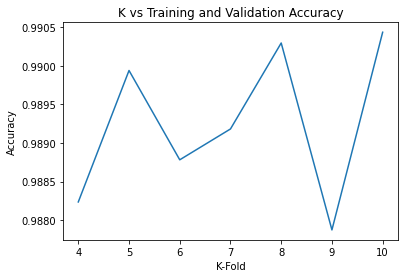

In [12]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
%matplotlib inline

c0 = 5
c1 = 7
acc = []
X = np.vstack([x_train, x_test])
y = np.hstack([y_train, y_test])

for k in range(4, 11):
  kf = KFold(n_splits=k)
  kacc = []
  for train_index, test_index in kf.split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train_2classes, Y_train_2classes = extract_2classes(c0, c1, x_train, y_train)
    X_test_2classes, Y_test_2classes = extract_2classes(c0, c1, x_test, y_test)
    kacc.append(calc_accuracy(X_train_2classes,X_test_2classes,Y_train_2classes,Y_test_2classes))
  kacc = np.array(kacc)
  acc.append(np.mean(kacc))

print(acc)
plt.plot(K, acc)
plt.xlabel('K-Fold')
plt.ylabel('Accuracy')
plt.title('K vs Training and Validation Accuracy')
plt.show()